TO DO
- add notes to visualizations
- adjust 3d plot sizing
- add interactivity to 3d plot for moving the view?

- Prep report for team
    - upload to Github and create link over nbviewer
    - download HTML version for file saving
    
    
- build function to apply whole dataset

Import the relevant libraries:

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

In [4]:
#Load the data file
#os.chdir(os.path.dirname(os.path.realpath(__file__)))
df = pd.read_excel('2101-BA-HeatMap_DATA.xlsx')

In [5]:
"""
Make a general function to do this analysis for each data piece
Subset data by Animal and slice# to map for each slice
Can save the interpolations to be replotted in Python or other

Input = data table w/ coordinates
Output = 2D and 3D plots for each; interpolated data arrays

"""

'\nMake a general function to do this analysis for each data piece\nSubset data by Animal and slice# to map for each slice\nCan save the interpolations to be replotted in Python or other\n\nInput = data table w/ coordinates\nOutput = 2D and 3D plots for each; interpolated data arrays\n\n'

In [43]:
#Pull 1 animal for testing

df = df[df.Animal == "A023"]
df = df[df.SliceNumber == 3]
df = df[pd.notnull(df.X)]
x = df['X']
y = df['Y']
z = np.around(df['Total Bicalutamide (ng/g)'], 1)

df

,Animal,ProstatePunch,SliceNumber,Implant,X,Y,R-Bicalutamide (ng/g),S-Bicalutamide (ng/g),Total Bicalutamide (ng/g),R-Bicalutamide (nM),S-Bicalutamide (nM),Total Bicalutamide (nM)
0,A023,1,3.0,X,0.0,0.0,1120,1030,2150.0,2576.00,2369.00,4945.00
1,A023,2,3.0,NaN,1.0,0.0,107,95.3,202.3,246.10,219.19,465.29
2,A023,3,3.0,NaN,2.0,0.0,94.6,101,195.6,217.58,232.30,449.88
3,A023,4,3.0,X,3.0,0.0,741,651,1392.0,1704.30,1497.30,3201.60
4,A023,5,3.0,NaN,4.0,0.0,59.7,42.9,102.6,137.31,98.67,235.98
5,A023,6,3.0,NaN,-1.0,0.0,896,772,1668.0,2060.80,1775.60,3836.40
6,A023,7,3.0,NaN,-1.0,-1.0,156,129,285.0,358.80,296.70,655.50
7,A023,8,3.0,NaN,0.0,-1.0,110,100,210.0,253.00,230.00,483.00
8,A023,9,3.0,NaN,2.0,-1.0,207,171,378.0,476.10,393.30,869.40
9,A023,10,3.0,NaN,3.0,-1.0,105,92.8,197.8,241.50,213.44,454.94


We pull a single tissue slice and remap the concentration values to a grid, represented by the coordinates.

In this case we have pulled data from "Slice #3" from Animal# A023.

In [44]:
x1 = np.linspace(min(x), max(x), len(np.unique(x)))
y1 = np.linspace(min(y), max(y), len(np.unique(y)))
X1, Y1 = np.meshgrid(x1, y1)

Z1 = griddata((x, y), z, (X1, Y1), method='cubic')

Then we can take this gridded data and plot it. We can also perform an interpolation between the points for a smoother data map.

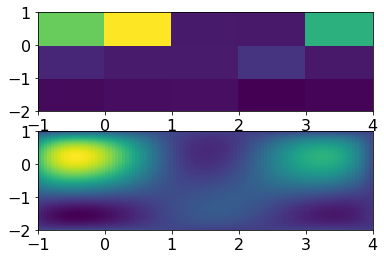

In [45]:
# convert coordinate to spatial distances in cm or mm
#peform interpolation to smooth between data points

#convert Nan values to 0 for the interpolation
Z1[np.isnan(Z1)]=0

x2 = np.linspace(min(x), max(x), 100)
y2 = np.linspace(min(y), max(y), 100)
f = interp2d(x1, y1, Z1, kind = 'cubic')
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].pcolormesh(X1, Y1, Z1)

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2 )

plt.show()


We can also replot this colormap as a 3D plot:

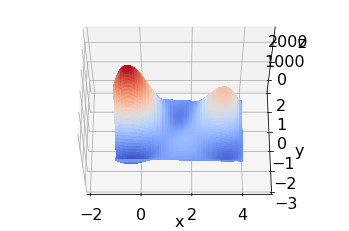

In [50]:
#3D plot of the same
ax = plt.axes(projection = '3d')

surf = ax.plot_surface(X2, Y2, Z2, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.xlim([min(x)-1, max(x)+1])
plt.ylim([min(y)-1, max(y)+1])

fig.colorbar(surf,shrink=0.25, aspect=5)
ax.view_init(60, -90)

plt.show()

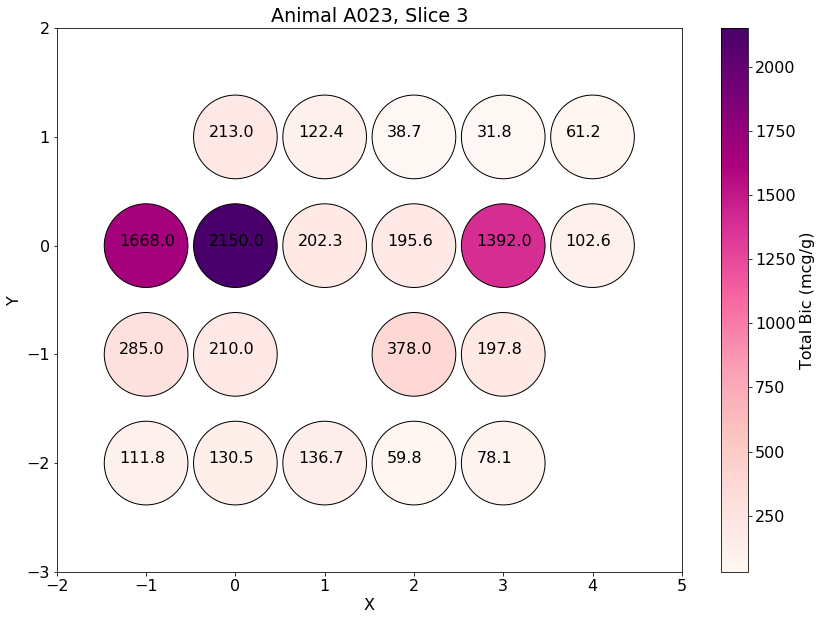

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

c = z

plt.rcParams['font.size']=16

plt.scatter(x, y, c=c, cmap='RdPu', s=7000,edgecolors='black')
cbar = plt.colorbar()
cbar.set_label('Total Bic (mcg/g)')

plt.xlim([min(x)-1, max(x)+1])
plt.ylim([min(y)-1, max(y)+1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Animal A023, Slice 3')

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i]-0.3,y[i]))